Bayesian statistics offers us a principled way to account for uncertainty. Probability is belief. Bayesian inference is all about updating our beliefs once we obtain some data.

This updating of beliefs is exactly how we move from the prior distribution to the posterior distribution. The "Bayesian" part is the methodology for doing this.

At the end of the day, Bayesian inference returns a posterior *probability distribution* over all "possibilities," not a single point estimate. This differentiates it from a lot of frequentist analyses, and it's what is meant when one says something about Bayesian methods keeping track of uncertainty. After we factor the data into our beliefs, we are still usually not completely certain.

What do I mean by "possibilities?" Usually we are trying to infer information about some unknown quantities, such as data-generating parameters or unobserved variables, given that we have some observed data. We have a prior distribution over the possible values of these "unseens," and after the data is factored in, we are left with an updated, posterior distribution over the possible values.

These "unseens" are usually called *latent variables.* The terminlogy can be confusing, and seems to refer to two different types of variables:
* A unobserved random variable which takes an unknown value whenever an observed value does. For example, we have a bunch of real-valued data points which we assume are each drawn from one of two possible Gaussian distributions. Which distribution any given point is drawn from is a latent variable which *has* a value for every data point, but we didn't observe it. We probably have some prior knowledge about how these variables are distributed, but only performing Bayesian inference will allow us to use the data to update that knowledge. We are probably interested in inferring which Gaussian distribution each data point came from (this is a popular "Gaussian mixture" model). 
* A data-generating parameter which is unknown. For example, we can assume that the heights of a collection of individuals are drawn from a normal distribution, but we don't know *a priori* what the mean or standard deviation of that distribution are. We may have some prior ideas about the values of these parameters, and performing inference via Bayes' rule will allow us to update our priors into posteriors. Note that under our model the same mean and standard deviation are used for every individual, in contrast with the latent variable in the previous example.

In any case, we start with some prior knowledge about (distributions over) the unknown variables/parameters. The general inference problem is to use the data to update this prior knowledge. The posterior distribution thus represents our knowledge about the plausible values of these variables, having factored in our observations.

I think about this Bayesian updating as "tuning" the priors toward the data; in fact, the more data we have, the more tuned toward the data the distributions will become. As the book states, the prior naturally becomes "washed out" by the observations. This is natural in the sense that it's a mathematical result of Bayes' rule: we don't need to set some parameter to handle the trade-off between the prior and the data, the quantity of data and the distributions we chose will do this automatically!

For cases where data is sparse, our posterior will more closely represent the prior, and this is intuitively satisfying!

Joe once told me he thought of Bayesian stats being useful in situations where we don't have a lot of data. I think it's more broadly applicable than that quote might suggest, but the point is well-taken. The book even emphasizes that Bayesian stats is particular useful in the cases of not-quite-enough data.

I used Bayesian modeling to some success in the safety stock project, where many SKUs had sparse sales data. I was able to make satisfying predictions for these SKUs by
1. choosing a prior distribution which gave me realistic results even before factoring in the data, and
2. using a Bayesian hierchical model, which leveraged data across all SKUs while respecting the natural SKU hierarchy.

For SKUs with very sparse data, the resulting distributions more closely resemble the prior; for SKUs with plenty of data, the results look very representative of the data!





### Coin Flip Example

Let $X$ represent the result of a coin flip, either heads or tails. Our data consists of a collection of coin tosses, and we are interested in making inferences about the (latent) coin fairness parameter, $\theta$, defined as $$ Pr\left(X = H \, \middle| \, \theta \right) = \theta. $$ That is, $\theta$ is the probability of the coin flip resulting in heads.

We can initially assume nothing about the coin's fairness; this corresponds to a uniform prior distribution over possible values of $\theta$: $$p\left(\theta\right) = \text{U}\left(0,1\right). $$ The goal of Bayesian inference is to use the observed data to obtain a posterior distribution over possible values of $\theta$: $$ p\left(\theta \, \middle| \, \mathcal{D}\right) $$ where $\mathcal{D} = \left\{ X_i \, : \, i = 1,2,...,N \right\}$ is the observed data set.

By using Bayes' rule, we get $$ p\left(\theta \, \middle| \, \mathcal{D}\right) \propto p\left(\mathcal{D} \, \middle| \, \theta\right) p\left(\theta \right). $$ On the right-hand side, the factor on the right is the prior distribution. The factor on the left is the data likelihood, a function which measures how likely the observed data is, given a particular value of $\theta$. Bayes' rule has allowed us to "invert" this quantity to determine (up to a proportionality constant) the likelihood/plausibility of various values of $\theta$ given the data $\mathcal{D}$; this is exactly what we're looking for!

The data likelihood for this problem is going to be 
\begin{align} 
    p\left(\mathcal{D}\,\middle|\, \theta\right) & = \prod_{i=1}^N p\left(y^i \, \middle| \, \theta\right) \\
    & = \prod_{i=1}^N \theta^{y^i}\left(1-\theta\right)^{1-y^i}
\end{align}
where we have encoded $y^i = 1$ to mean that coin flip $i$ resulted in a heads, and $y^i = 0$ if it was a tails. We assume that the coin flips were i.i.d. generated.

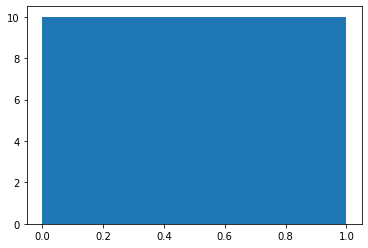

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# generate some data from a Bernoulli distribution
theta_exact = 0.645  # actual coin "fairness"
D = stats.bernoulli(p=theta_exact).rvs(20) 

plt.hist(D, bins=2);

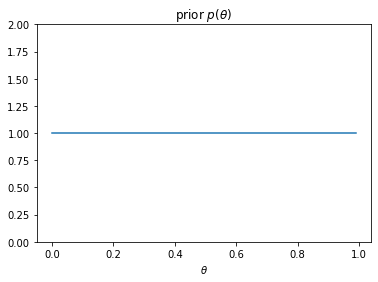

In [45]:
# prior = uniform distribution over [0, 1]
x = np.arange(start=0, stop=1, step=.01)
prior = np.ones_like(x)

fig, ax = plt.subplots()
ax.plot(x, prior)
ax.set(ylim=[0,2], title=r'prior $p\left(\theta\right)$', xlabel=r'$\theta$')
plt.show()


The posterior distribution is $$ p\left(\theta \, \middle| \, \mathcal{D}\right) = k \, p\left(\theta\right) \prod_{i=1}^n \theta^{y^i} \left(1-\theta\right)^{1-y^i} $$ where $k$ is a (normalization) constant of proportionality and $p\left(\theta\right)$ is the uniform density on $\left[0,1\right]$, i.e., $p\left(\theta\right) = 1$. 

This is a small enough problem that we can cover the space of $\theta$ with a discrete grid and for each value of $\theta$ on this grid, calculate this product. What we will see is that for some values of $\theta$, this quantity will be very small; this indicates that that value of $\theta$ is not very plausible, given the data. Other values of $\theta$ will see this posterior being relatively large, indicating more plausible values.

The book creates graphs by actually analytically computing the posterior and simply plotting it. In this toy example it's fairly easy to do this, but for real problems, we will be able to take neither the analytical approach or this grid method I do here.

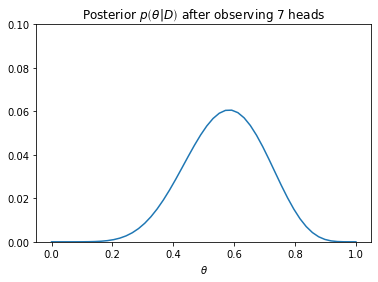

In [58]:

n_grid = 50
theta_grid = np.linspace(start=0, stop=1, num=n_grid)  # grid

# generate some data
D_size = 12
Dp = stats.bernoulli(p=theta_exact).rvs(size=D_size)

post = np.zeros_like(theta_grid)
# compute the value of the posterior for every theta
for i,t in enumerate(theta_grid):
    post[i] = np.array([t**(d) * (1 - t)**(1-d) for d in Dp]).prod()
# normalize it to circumvent the proportionality constant
post = post / post.sum()

fig, ax = plt.subplots()
ax.plot(theta_grid, post)
ax.set(
    title=rf"Posterior $p\left(\theta | D \right)$ after observing {Dp.sum()} heads",
    xlabel=r"$\theta$",
    ylim=[0,.1]
    )
plt.show()

Issue: the "amplitude" of the posterior drops as I use more points in my grid. Does this make sense? The quantities I'm computing for each value of $\theta$ in the grid don't change, but the total number of them increases, so it makes sense. There is some issue with the normalization. But if this was truly continuous instead of discrete, this wouldn't be a problem? **Check the Rethinking Statistics book to see how it's done there!**

### Text messages example

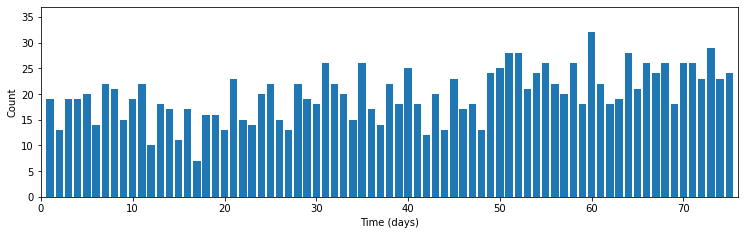

In [2]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

lam_1 = 17.8
lam_2 = 22.5
tau = 44
N = 75

y = np.concatenate([
    poisson(mu=lam_1).rvs(size=tau),
    poisson(mu=lam_2).rvs(size=N-tau),
])
x = np.arange(start=1, stop=N+1, step=1)

fig, ax = plt.subplots(figsize=(12.5, 3.5))
# ax.vlines(x, 0, y, lw=3)
ax.bar(x, y, color='tab:blue')
ax.set(xlabel='Time (days)', ylabel='Count', ylim=[0,np.max(y)+5], xlim=[0, N+1])
plt.show()

The following model (kind of) represents our understanding of the data-generating process.
\begin{align}
\tau & \sim \text{DiscreteUniform}\left(1,75\right) \\
\mu & = \left\{ \begin{array}{rl} \mu_1 & \text{if } t < \tau \\ \mu_2 & \text{if } t \geq \tau \end{array} \right. \\
y_i & \sim \text{Poisson}\left(\mu\right) \\
\mu_1, \, \mu_2 & \sim \text{Exp}\left(\alpha\right) \\
\end{align}

In [3]:
import pymc as pm

with pm.Model() as model:
    alpha = 1.0 / y.mean()  # using data to set prior hyperparameter
    
    # prior on lambdas: both lambdas drawn from the same prior
    lambda_1 = pm.Exponential('lambda_1', alpha)
    lambda_2 = pm.Exponential('lambda_2', alpha)

    # prior on tau
    tau = pm.DiscreteUniform('tau', lower=0, upper=len(y))

    # implement switching
    idx = np.arange(len(y))
    lambda_ = pm.math.switch( tau > idx, lambda_1, lambda_2)

    # likelihood: how was data generated?
    y_obs = pm.Poisson('obs', lambda_, observed=y)

In [4]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [lambda_1]
>Metropolis: [lambda_2]
>Metropolis: [tau]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 36 seconds.


In [6]:
trace['lambda_1']

array([17.53332522, 17.53332522, 18.30321593, ..., 18.46365819,
       18.46365819, 18.46365819])

Where does everything else come in? Like graphical models, or neural nets, all that other ML?